In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
import numpy as np

In [150]:
import warnings
warnings.filterwarnings('ignore')

In [206]:
df = pd.read_csv('survey_results_public.csv')

>The Tasks:
- How many developers participated in this survey?
- Find the top 10 countries participating devs are from.
- How many are from Nigeria?
- What's the average age the Nigerian dev wrote their first code?
- What's the average age of the Nigerian dev?
- What are the kinds of employment they are in?
- What's the gender distribution?
- What majors did they study in school?
- What languages have they worked with?
- What's the average number of languages they have worked with?
- What's the average number of years of experience of the Nigerian developer?

> Kicker
1. How many devs are women, age below 25 and earn a living from dev?
2. What are the 10 most popular languages among Naija devs?

PS: Minus gender, ignore missing values in columns in view.
My own solution this time next week.

In [207]:
df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


In [208]:
#df.info()

## Number of developers that participated in the survey

In [209]:
no_of_dev = len(df['Respondent'])
print(f'{no_of_dev} developers participated in this survey')

64461 developers participated in this survey


## Top ten countries participating developers are from

In [210]:
print('Top ten countries participating developers are from')
print('=='*25)
df['Country'].value_counts().sort_values(ascending=False)[:10]

Top ten countries participating developers are from


United States     12469
India              8403
United Kingdom     3896
Germany            3890
Canada             2191
France             1898
Brazil             1818
Netherlands        1343
Poland             1278
Australia          1208
Name: Country, dtype: int64

Text(0.5, 1.0, 'Top ten countries participating developer are from')

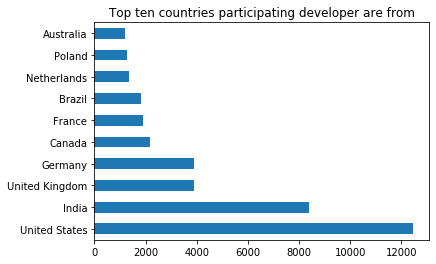

In [211]:
df['Country'].value_counts().sort_values(ascending=True)[:10].plot(kind='barh')
plt.title('Top ten countries participating developer are from');

## Number of Nigerian Developers

In [212]:
Nigeria = df[df['Country']=='Nigeria']

In [213]:
print(f'There are {len(Nigeria)} developers from Nigeria')

There are 593 developers from Nigeria


## Average age a Nigerian Developer wrote their first code

In [214]:
Nigeria_age1stcode = Nigeria['Age1stCode'].astype('float')

In [215]:
print(f'The average age a Nigerian Developer wrote their first code is {round(Nigeria_age1stcode.mean())} years old')

The average age a Nigerian Developer wrote their first code is 20 years old


## Average age  of a Nigerian Developer

In [216]:
avg_age = round(Nigeria['Age'].mean())
print(f'The average age  of a Nigerian Developer is {avg_age} years old')

The average age  of a Nigerian Developer is 26 years old


## Employment Status of Nigerian Developers

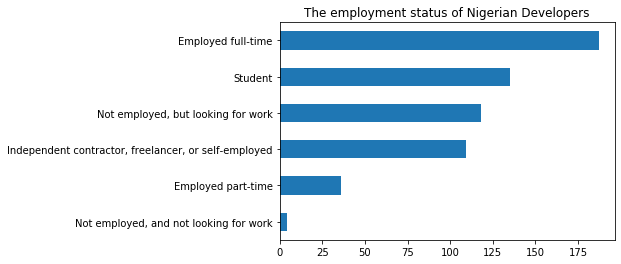

In [217]:
Nigeria['Employment'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('The employment status of Nigerian Developers');

In [218]:
#Number of missing values in Gender Column
Nigeria['Gender'].isna().sum()

151

## Gender distribution

In [219]:
Nigeria['Gender'].value_counts()

Man                                                  408
Woman                                                 31
Woman;Man                                              2
Non-binary, genderqueer, or gender non-conforming      1
Name: Gender, dtype: int64

In [220]:
Nigeria[Nigeria['Gender']=='Woman;Man']='Others'

In [221]:
Nigeria[Nigeria['Gender']=='Non-binary, genderqueer, or gender non-conforming']='Others'

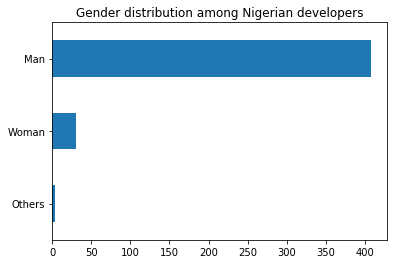

In [222]:
Nigeria['Gender'].value_counts().sort_values().plot(kind='barh')
plt.title('Gender distribution among Nigerian developers');

In [223]:
#plt.pie?

In [224]:
#gender['Woman;Man']==other

In [225]:
#Nigeria['Sexuality'].value_counts()

In [226]:
#Nigeria['Trans'].value_counts()

## Majors that Nigerian Developers studied in school

In [227]:
major = Nigeria['UndergradMajor']

In [228]:
major.value_counts()

Computer science, computer engineering, or software engineering                   190
Another engineering discipline (such as civil, electrical, mechanical, etc.)       62
A natural science (such as biology, chemistry, physics, etc.)                      32
Mathematics or statistics                                                          24
Information systems, information technology, or system administration              23
A business discipline (such as accounting, finance, marketing, etc.)               18
A health science (such as nursing, pharmacy, radiology, etc.)                      10
A social science (such as anthropology, psychology, political science, etc.)        9
A humanities discipline (such as literature, history, philosophy, etc.)             9
Web development or web design                                                       8
I never declared a major                                                            3
Others                                                

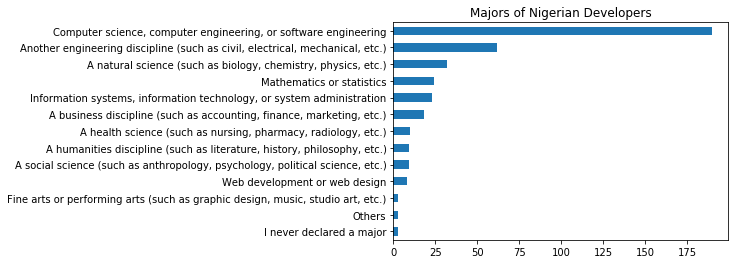

In [229]:
major.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Majors of Nigerian Developers');

## Languages Nigerian Dev have worked with

In [230]:
lang = Nigeria['LanguageWorkedWith'].astype('str')

In [231]:
lang.replace('nan', np.nan, inplace=True)

In [232]:
lan = lang.dropna()

In [233]:
val = lan.str.cat(sep=';')

In [234]:
dar = pd.Series(val.split(';'))

In [235]:
print(f'Top ten languages that Nigerian developers work with')
print('='*60)
dar.value_counts()[:10]

Top ten languages that Nigerian developers work with


HTML/CSS      392
JavaScript    364
SQL           239
PHP           217
Python        189
Java          172
C#             99
TypeScript     84
C++            73
C              52
dtype: int64

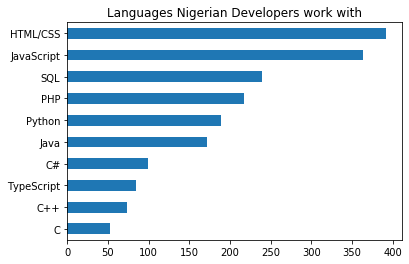

In [236]:
dar.value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Languages Nigerian Developers work with');

## Average number of languages they have worked with

In [237]:
avg_lang = round(dar.count().sum()/len(Nigeria))
print(f'A Nigerian developer has worked with {avg_lang} languages on average')

A Nigerian developer has worked with 4.0 languages on average


In [238]:
#Nigeria['YearsCode'].unique()

In [242]:
Nigeria['YearsCode'].replace('Others', 1,inplace=True )

In [244]:
#Nigeria['YearsCode'].value_counts()

## Average number of years of experience coding for Nigerian developer

In [245]:
Years_experience = Nigeria['YearsCode'].astype('float')

In [246]:
print(f'The total number of years of experience coding is {round(Years_experience.mean())} years')

The total number of years of experience coding is 5 years


In [247]:
#Nigeria['YearsCodePro'].unique()

In [250]:
Nigeria['YearsCodePro'].replace('Others', 1,inplace=True )

## Average number of years of experience coding Professionally
## for Nigerian developer

In [251]:
Years_experience_pro = Nigeria['YearsCodePro'].astype('float')

In [252]:
print(f'The total number of years of experience coding professionally \
is {round(Years_experience_pro.mean())} years')

The total number of years of experience coding professionally is 4 years


## How many Dev are women, age below 25 
## and earning a living from Dev

In [253]:
woman = df[df['Gender']=='Woman']# and Nigeria['Age']<25]]

In [254]:
woman_25 = woman[woman['Age']<25]

In [255]:
woman_25_pro =woman_25['YearsCodePro'].value_counts().sum()

In [256]:
print(f'The total number of women under 25 years earning \
 a living as a developer is {woman_25_pro}')

The total number of women under 25 years earning  a living as a developer is 455


## Most Popular Languages among Nigerian Developers

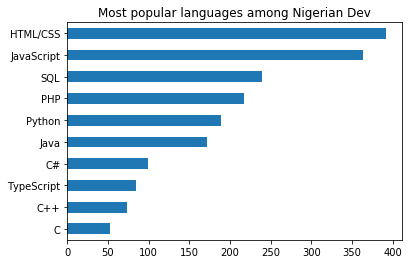

In [257]:
dar.value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Most popular languages among Nigerian Dev');